# RL Tutorial | Policy Iteration and Value Iteration

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

Setup the environment:

In [2]:
env = gym.make("CliffWalking-v0", render_mode="rgb_array")
n_states = env.observation_space.n
n_actions = env.action_space.n
P = env.unwrapped.P

Displaying the environment:

(-0.5, 719.5, 239.5, -0.5)

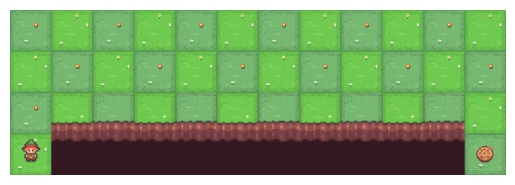

In [3]:
env.reset()
plt.imshow(env.render())
plt.axis("off")

# Value Iteration

<img src="images/vi.png" width="70%" />

In [4]:
def valueIterationAgent(gamma=0.75, threshold=0.01):
    """threshold: Permissible accuracy of our estimates"""

    # Initialize values (and policy)
    values = np.zeros(n_states, dtype=float)
    policy = np.zeros(n_states, dtype=int)

    while True:
        diff = 0.0  # difference in values (from previous iteration)

        for s in range(n_states):
            if s == n_states - 1:  # Ignore terminal state
                continue

            # Q-values (for this state)
            q = np.zeros(n_actions, dtype=float)
            for a in range(n_actions):
                for prob, next_state, reward, done in P[s][a]:
                    q[a] += prob * (reward + gamma * values[next_state])

            # Update Value and Policy
            last_value = values[s]
            policy[s] = np.argmax(q)
            values[s] = q[policy[s]]
            diff = max(diff, abs(values[s] - last_value))

        if diff < threshold:  # Values have converged
            break

    return policy

# Policy Iteration

<img src="images/pi.png" width="70%" />

In [5]:
def policyIterationAgent(gamma=0.75, threshold=0.01):
    """threshold: Permissible accuracy of our estimates"""

    def policy_evaluation(policy):
        values = np.zeros(n_states, dtype=float)
        while True:
            diff = 0.0  # difference in values (from previous iteration)

            for s in range(n_states):
                if s == n_states - 1:  # Ignore terminal state
                    continue

                new_value = 0.0
                for prob, next_state, reward, done in P[s][policy[s]]:
                    new_value += prob * (reward + gamma * values[next_state])

                # Update Value
                diff = max(diff, abs(values[s] - new_value))
                values[s] = new_value

            if diff < threshold:  # Values have converged
                break
        return values

    def policy_improvement(values):
        policy_stable = True
        for s in range(n_states):

            if s == n_states - 1:  # Ignore terminal state
                continue

            q = np.zeros(n_actions, dtype=float)  # Q-values (for this state)
            for a in range(n_actions):
                for prob, next_state, reward, done in P[s][a]:
                    q[a] += prob * (reward + gamma * values[next_state])

            initial_action = policy[s]
            policy[s] = np.argmax(q)  # New greedy action

            if initial_action != policy[s]:
                policy_stable = False

        return policy, policy_stable

    # Execute
    policy = np.zeros(n_states, dtype=int)
    while True:
        values = policy_evaluation(policy)
        policy, policy_stable = policy_improvement(values)
        if policy_stable:
            return policy

## Confused Agent

In [6]:
def confusedAgent():
    """Returns a Policy where random action is picked for each state"""
    return np.array([env.action_space.sample() for _ in range(n_states)], dtype="int")

## Display Policies

In [7]:
def pretty_print_policy(policy):
    """Utility method to print policies in map format"""
    rows, columns = 4, n_states // 4
    print_policy = policy.reshape(4, -1)
    for i in range(rows):
        if i == 0:
            print("     ", end="")

            for j in range(columns):
                print(j, end="   ")
            print()

        print(i, end="  | ")
        for j in range(columns):
            print(["↑", "→", "↓", "←"][print_policy[i][j]], end=" | ")

        print()

In [8]:
pretty_print_policy(valueIterationAgent())

     0   1   2   3   4   5   6   7   8   9   10   11   
0  | → | → | → | → | → | → | → | → | → | → | → | ↓ | 
1  | → | → | → | → | → | → | → | → | → | → | → | ↓ | 
2  | → | → | → | → | → | → | → | → | → | → | → | ↓ | 
3  | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | → | ↑ | 


In [9]:
pretty_print_policy(confusedAgent())

     0   1   2   3   4   5   6   7   8   9   10   11   
0  | ↑ | ← | ← | ↓ | ↑ | ↓ | → | → | ↓ | → | ← | ↓ | 
1  | ↑ | ← | → | ↓ | ↓ | ↓ | ← | ← | ↑ | → | ← | ↑ | 
2  | ↓ | ← | ← | ← | ← | ↑ | ← | ↑ | → | ↑ | ↓ | ↓ | 
3  | ↓ | ↓ | → | ↓ | ↑ | ↑ | ↓ | ↑ | ← | ↓ | ← | ↑ | 


In [10]:
pretty_print_policy(policyIterationAgent())

     0   1   2   3   4   5   6   7   8   9   10   11   
0  | → | → | → | → | → | → | → | → | → | → | → | ↓ | 
1  | → | → | → | → | → | → | → | → | → | → | → | ↓ | 
2  | → | → | → | → | → | → | → | → | → | → | → | ↓ | 
3  | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | ↑ | → | ↑ | 
